In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt #visualisation 

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('asylum-applications.csv')

In [4]:
df.head()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
0,2018,Albania,Austria,ALB,AUT,G,N,FA,P,63
1,2018,Albania,Belgium,ALB,BEL,G,N,FI,P,505
2,2018,Albania,Belgium,ALB,BEL,G,R,RA,P,165
3,2018,Albania,Cyprus,ALB,CYP,G,N,FI,P,5
4,2018,Albania,Czechia,ALB,CZE,G,N,FI,P,5


In [5]:
df.tail()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
3493,2023,Ukraine,Sweden,UKR,SWE,G,A,AR,P,7
3494,2023,Ukraine,Sweden,UKR,SWE,G,N,FI,P,232
3495,2023,Ukraine,Sweden,UKR,SWE,G,R,RA,P,40
3496,2023,Ukraine,Switzerland,UKR,CHE,G,N,FI,P,17
3497,2023,Ukraine,Türkiye,UKR,TUR,G,N,FI,P,520


In [6]:
df.shape

(3498, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


In [8]:
df.describe()

,Year,applied
count,3498.000000,3498.000000
mean,2020.489423,305.375071
std,1.717220,1963.590716
min,2018.000000,5.000000
25%,2019.000000,6.000000
50%,2021.000000,22.000000
75%,2022.000000,117.000000
max,2023.000000,100758.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [11]:
df = df.drop_duplicates()
df.head(10)

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
0,2018,Albania,Austria,ALB,AUT,G,N,FA,P,63
1,2018,Albania,Belgium,ALB,BEL,G,N,FI,P,505
2,2018,Albania,Belgium,ALB,BEL,G,R,RA,P,165
3,2018,Albania,Cyprus,ALB,CYP,G,N,FI,P,5
4,2018,Albania,Czechia,ALB,CZE,G,N,FI,P,5
5,2018,Albania,Denmark,ALB,DNK,G,N,FI,P,78
6,2018,Albania,Finland,ALB,FIN,G,N,FI,P,36
7,2018,Albania,Finland,ALB,FIN,G,R,RA,P,5
8,2018,Albania,France,ALB,FRA,G,A,AR,P,4262
9,2018,Albania,France,ALB,FRA,G,N,FI,P,8311


In [12]:
df.tail()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
3493,2023,Ukraine,Sweden,UKR,SWE,G,A,AR,P,7
3494,2023,Ukraine,Sweden,UKR,SWE,G,N,FI,P,232
3495,2023,Ukraine,Sweden,UKR,SWE,G,R,RA,P,40
3496,2023,Ukraine,Switzerland,UKR,CHE,G,N,FI,P,17
3497,2023,Ukraine,Türkiye,UKR,TUR,G,N,FI,P,520


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Application Numbers      3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


# Dealing with missing data in dataset

In [15]:
df.isnull().sum()

Year                        0
Country of origin           0
Country of asylum           0
Country of origin (ISO)     0
Country of asylum (ISO)     0
Authority                   0
Application type            0
Stage of procedure         65
Application Numbers         0
applied                     0
dtype: int64

In [16]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a","na"," ","--","nan","UnKnown","Na","unknown"]
df= pd.read_csv("asylum-applications.csv", na_values = missing_value_formats)

In [17]:
df = df.dropna(axis = 1, how ='all')

In [35]:
df.isnull().sum()

Year                       0
Country of origin          0
Country of asylum          0
Country of origin (ISO)    0
Country of asylum (ISO)    0
Authority                  0
Application type           0
Stage of procedure         0
Cases / Persons            0
applied                    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


In [20]:
df = df[df['Stage of procedure'] != ' ']

In [21]:
df = df[df['Stage of procedure'] != 'nan']

In [22]:
df.isnull().sum()

Year                        0
Country of origin           0
Country of asylum           0
Country of origin (ISO)     0
Country of asylum (ISO)     0
Authority                   0
Application type            0
Stage of procedure         65
Cases / Persons             0
applied                     0
dtype: int64

# Some visuals of initial dataset

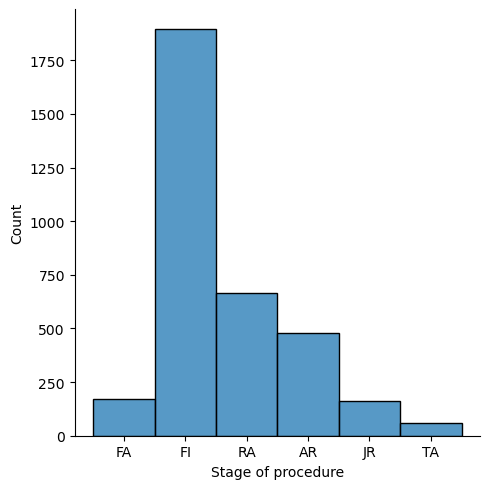

In [23]:
sns.displot(df["Stage of procedure"])

<Axes: xlabel='applied'>

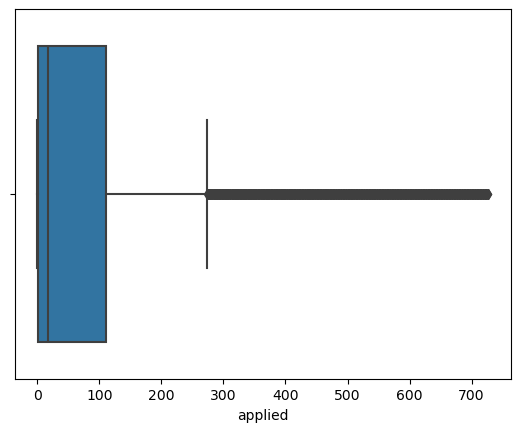

In [52]:
sns.boxplot(x=df["applied"])

# Data Preperation

In [24]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()

In [25]:
df = df.apply(le.fit_transform)

# Modelling and Evaluation

In [36]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [38]:
# Putting feature variable to X
X = df.drop('applied',axis=1)

# Putting response variable to y
y = df['applied']

In [39]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons
203,0,13,11,15,12,0,0,0,1
1593,2,30,40,32,42,0,0,0,1
912,1,27,14,23,16,0,4,4,1
113,0,3,32,3,36,0,2,2,1
2018,3,27,17,23,19,0,0,0,1


In [29]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00      1031

    accuracy                           1.00      1050
   macro avg       1.00      1.00      1.00      1050
weighted avg       1.00      1.00      1.00      1050



In [31]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[  19    0]
 [   0 1031]]
1.0


[Text(0.5555555555555556, 0.9166666666666666, 'x[2] <= 43.5\ngini = 0.033\nsamples = 2448\nvalue = [41, 2407]'),
 Text(0.3333333333333333, 0.75, 'x[2] <= 13.5\ngini = 0.014\nsamples = 2322\nvalue = [16, 2306]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[2] <= 12.5\ngini = 0.051\nsamples = 607\nvalue = [16, 591]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 531\nvalue = [0, 531]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 1.5\ngini = 0.332\nsamples = 76\nvalue = [16, 60]'),
 Text(0.2222222222222222, 0.25, 'x[0] <= 0.5\ngini = 0.499\nsamples = 31\nvalue = [16, 15]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.0\nsamples = 1715\nvalue = [0, 1715]'),
 Text(0.7777777777777

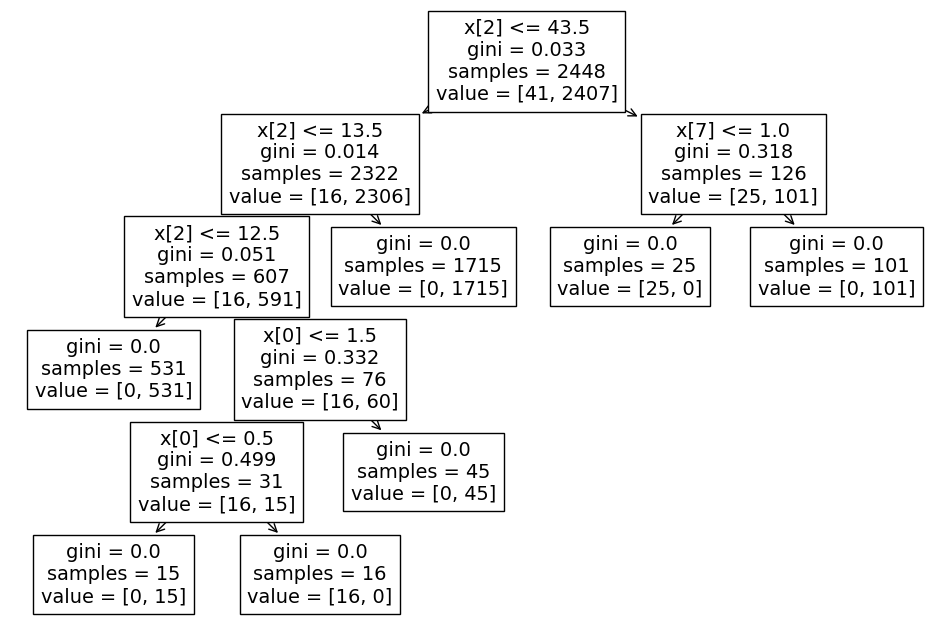

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

In [33]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2)},
             verbose=1)

In [34]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004388,0.001017,0.003393,0.001496,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007579,0.002240,0.004987,0.002092,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.003989,0.000631,0.002195,0.000400,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.005186,0.001323,0.002593,0.000488,entropy,11,"{'criterion': 'entropy', 'max_depth': 11}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.005784,0.002632,0.002792,0.000747,entropy,13,"{'criterion': 'entropy', 'max_depth': 13}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.004790,0.000978,0.003191,0.001601,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.004787,0.001163,0.002793,0.000746,gini,7,"{'criterion': 'gini', 'max_depth': 7}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.004984,0.002094,0.002197,0.000747,gini,9,"{'criterion': 'gini', 'max_depth': 9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,0.003790,0.001163,0.002594,0.001197,gini,11,"{'criterion': 'gini', 'max_depth': 11}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.004388,0.001353,0.001596,0.000488,gini,13,"{'criterion': 'gini', 'max_depth': 13}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [40]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 1.0
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [41]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

1.0

In [43]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004388,0.001017,0.003393,0.001496,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007579,0.002240,0.004987,0.002092,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.003989,0.000631,0.002195,0.000400,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.005186,0.001323,0.002593,0.000488,entropy,11,"{'criterion': 'entropy', 'max_depth': 11}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.005784,0.002632,0.002792,0.000747,entropy,13,"{'criterion': 'entropy', 'max_depth': 13}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.004790,0.000978,0.003191,0.001601,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.004787,0.001163,0.002793,0.000746,gini,7,"{'criterion': 'gini', 'max_depth': 7}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.004984,0.002094,0.002197,0.000747,gini,9,"{'criterion': 'gini', 'max_depth': 9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,0.003790,0.001163,0.002594,0.001197,gini,11,"{'criterion': 'gini', 'max_depth': 11}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.004388,0.001353,0.001596,0.000488,gini,13,"{'criterion': 'gini', 'max_depth': 13}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [44]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=100)

In [45]:
# accuracy score
clf_gini.score(X_test,y_test)

0.18

In [46]:
# accuracy score
clf_gini.score(X_test,y_test)

0.18

[Text(0.47575644841269843, 0.95, 'x[3] <= 30.5\ngini = 0.942\nsamples = 2448\nvalue = [553, 91, 72, 70, 55, 51, 35, 36, 32, 37, 36, 28\n26, 23, 14, 19, 16, 23, 10, 16, 19, 21, 13, 17\n13, 16, 9, 16, 10, 12, 16, 16, 10, 7, 9, 14\n12, 13, 9, 9, 4, 9, 6, 6, 5, 9, 5, 5, 6, 10\n11, 3, 6, 2, 7, 9, 3, 7, 6, 8, 6, 5, 7, 8\n7, 6, 8, 12, 3, 4, 6, 3, 6, 4, 4, 9, 2, 2\n6, 5, 2, 3, 3, 7, 2, 6, 4, 2, 2, 2, 3, 6\n2, 3, 2, 4, 1, 1, 4, 1, 1, 4, 7, 1, 4, 1\n6, 2, 1, 4, 3, 4, 5, 3, 1, 1, 1, 2, 2, 2\n3, 1, 4, 2, 3, 3, 5, 2, 1, 4, 2, 1, 1, 3\n2, 2, 3, 1, 4, 1, 2, 1, 1, 2, 2, 1, 1, 1\n2, 3, 1, 1, 1, 2, 4, 2, 2, 1, 1, 2, 1, 3\n1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1\n3, 1, 5, 2, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1\n3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1\n3, 1, 1, 1, 2, 1, 2, 4, 1, 1, 2, 1, 1, 3\n2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1\n3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1\n1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2\n1, 2, 1, 2

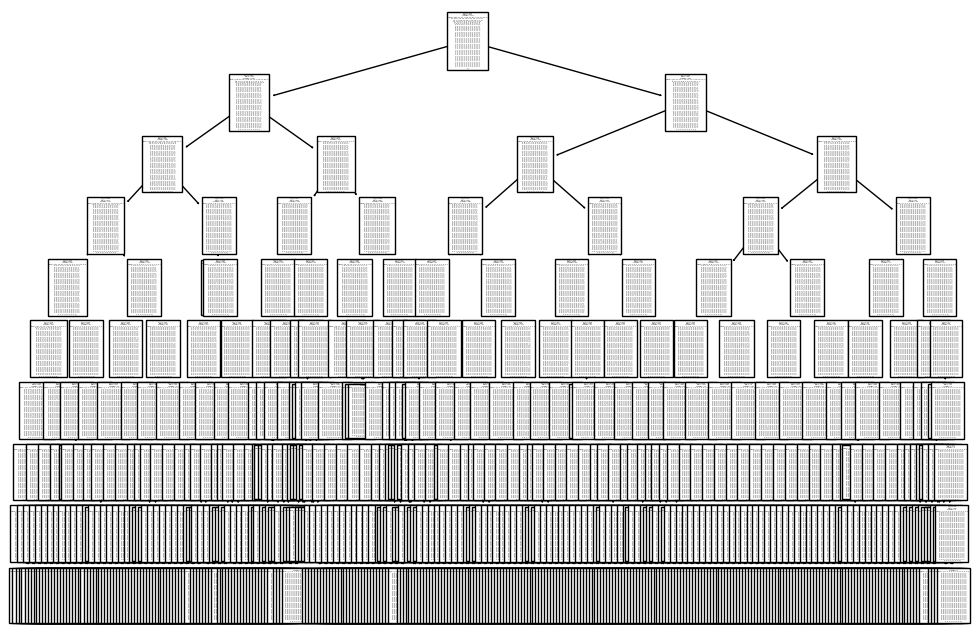

In [47]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [48]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.2342857142857143


[Text(0.5, 0.875, 'x[3] <= 30.5\ngini = 0.942\nsamples = 2448\nvalue = [553, 91, 72, 70, 55, 51, 35, 36, 32, 37, 36, 28\n26, 23, 14, 19, 16, 23, 10, 16, 19, 21, 13, 17\n13, 16, 9, 16, 10, 12, 16, 16, 10, 7, 9, 14\n12, 13, 9, 9, 4, 9, 6, 6, 5, 9, 5, 5, 6, 10\n11, 3, 6, 2, 7, 9, 3, 7, 6, 8, 6, 5, 7, 8\n7, 6, 8, 12, 3, 4, 6, 3, 6, 4, 4, 9, 2, 2\n6, 5, 2, 3, 3, 7, 2, 6, 4, 2, 2, 2, 3, 6\n2, 3, 2, 4, 1, 1, 4, 1, 1, 4, 7, 1, 4, 1\n6, 2, 1, 4, 3, 4, 5, 3, 1, 1, 1, 2, 2, 2\n3, 1, 4, 2, 3, 3, 5, 2, 1, 4, 2, 1, 1, 3\n2, 2, 3, 1, 4, 1, 2, 1, 1, 2, 2, 1, 1, 1\n2, 3, 1, 1, 1, 2, 4, 2, 2, 1, 1, 2, 1, 3\n1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1\n3, 1, 5, 2, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1\n3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1\n3, 1, 1, 1, 2, 1, 2, 4, 1, 1, 2, 1, 1, 3\n2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1\n3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1\n1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2\n1, 2, 1, 2, 1, 1, 2, 1, 2

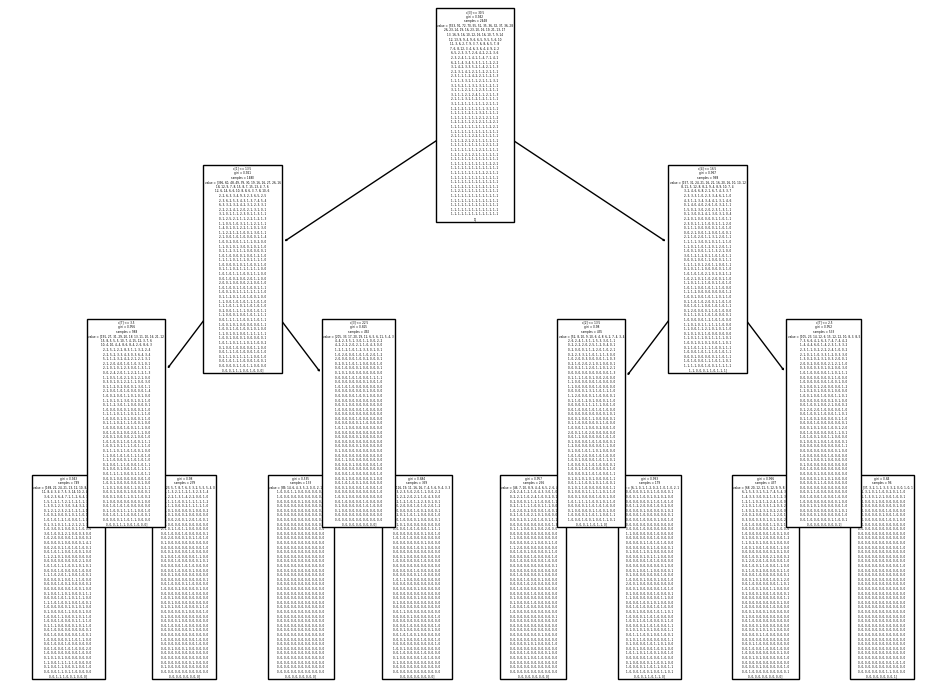

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

In [50]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      1.00      0.38       246
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.00    

In [51]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[246   0   0 ...   0   0   0]
 [ 42   0   0 ...   0   0   0]
 [ 34   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
